In [1]:
import datasets
import pandas as pd
from collections import defaultdict
from tqdm import tqdm

/home/xingyao6/opt/miniconda3/envs/interaction-eval/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = datasets.load_dataset("anon8231489123/ShareGPT_Vicuna_unfiltered", revision="main", data_files="ShareGPT_V3_unfiltered_cleaned_split.json")

# Figure out Underscore Issue

In [8]:
conversations = dataset["train"]["conversations"]

backslash_underscore_counter = 0
backslash_conv = []
for i, conv in tqdm(enumerate(conversations)):
    flatten_conv = ""
    for turn in conv:
        source = turn["from"].upper()
        flatten_conv += f"{source}:\n{turn['value']}\n"

    if r"\_" in flatten_conv:
        backslash_underscore_counter += 1
        backslash_conv.append({
            "conv_id": i,
            "conv": flatten_conv
        })
pct_backslash_underscore = backslash_underscore_counter / len(conversations)
backslash_conv = pd.DataFrame(backslash_conv)
print(f"Percentage of conversations with backslash underscore: {pct_backslash_underscore:.2%} ({backslash_underscore_counter}/{len(conversations)})")

94145it [00:01, 56391.69it/s]

Percentage of conversations with backslash underscore: 14.99% (14110/94145)


In [20]:
print(backslash_conv[6]["conv"])

GPT:
I am sorry, but the search query provided is not enough information to continue a conversation. Could you please provide more context? It would be helpful
HUMAN:
Search on the web for 196 PFISTER HOLDINGS LLC. 
Query: Who owns this company?
GPT:
I'm sorry, but I couldn't find any information about a company named "196 Pfister Holdings LLC" with a quick web search. It is possible that the company is privately held and therefore does not have much information publicly available. It is also possible that the name is misspelled or that the company does not exist. Could you please provide more details
HUMAN:
Web search results:

[1] "Free and open company data on Delaware (US) company BLACK CALABASH FAMILY HOLDINGS LLC (company number 5250511) ... Subscribe to our emails. The Open Database Of The Corporate World. Search. Companies Officers Log in/Sign up; BLACK CALABASH FAMILY HOLDINGS LLC Company Number 5250511 Incorporation Date ... inactive PBH, LLC (Florida (US), 21 Nov ..."
URL: h

# Calculate Turns

In [39]:
conversations = dataset["train"]["conversations"]
conv_turn_length_counter = defaultdict(int)
for conv in tqdm(conversations):
    conv_turn_length_counter[len(conv) // 2] += 1
conv_turn_length_counter = pd.Series(conv_turn_length_counter)
conv_turn_length_counter.sort_index(inplace=True)

100%|██████████| 94145/94145 [00:00<00:00, 1003608.44it/s]


In [52]:
print("TOTAL: ", conv_turn_length_counter.sum())
print("N_TURN >= 2: ", conv_turn_length_counter[2:].sum(), conv_turn_length_counter[2:].sum() / conv_turn_length_counter.sum())
print("N_TURN >= 5: ", conv_turn_length_counter[5:].sum(), conv_turn_length_counter[5:].sum() / conv_turn_length_counter.sum())

TOTAL:  94145
N_TURN >= 2:  69273 0.7358117797015242
N_TURN >= 5:  26714 0.2837537840565086


<Axes: title={'center': 'Conversation Length Distribution'}>

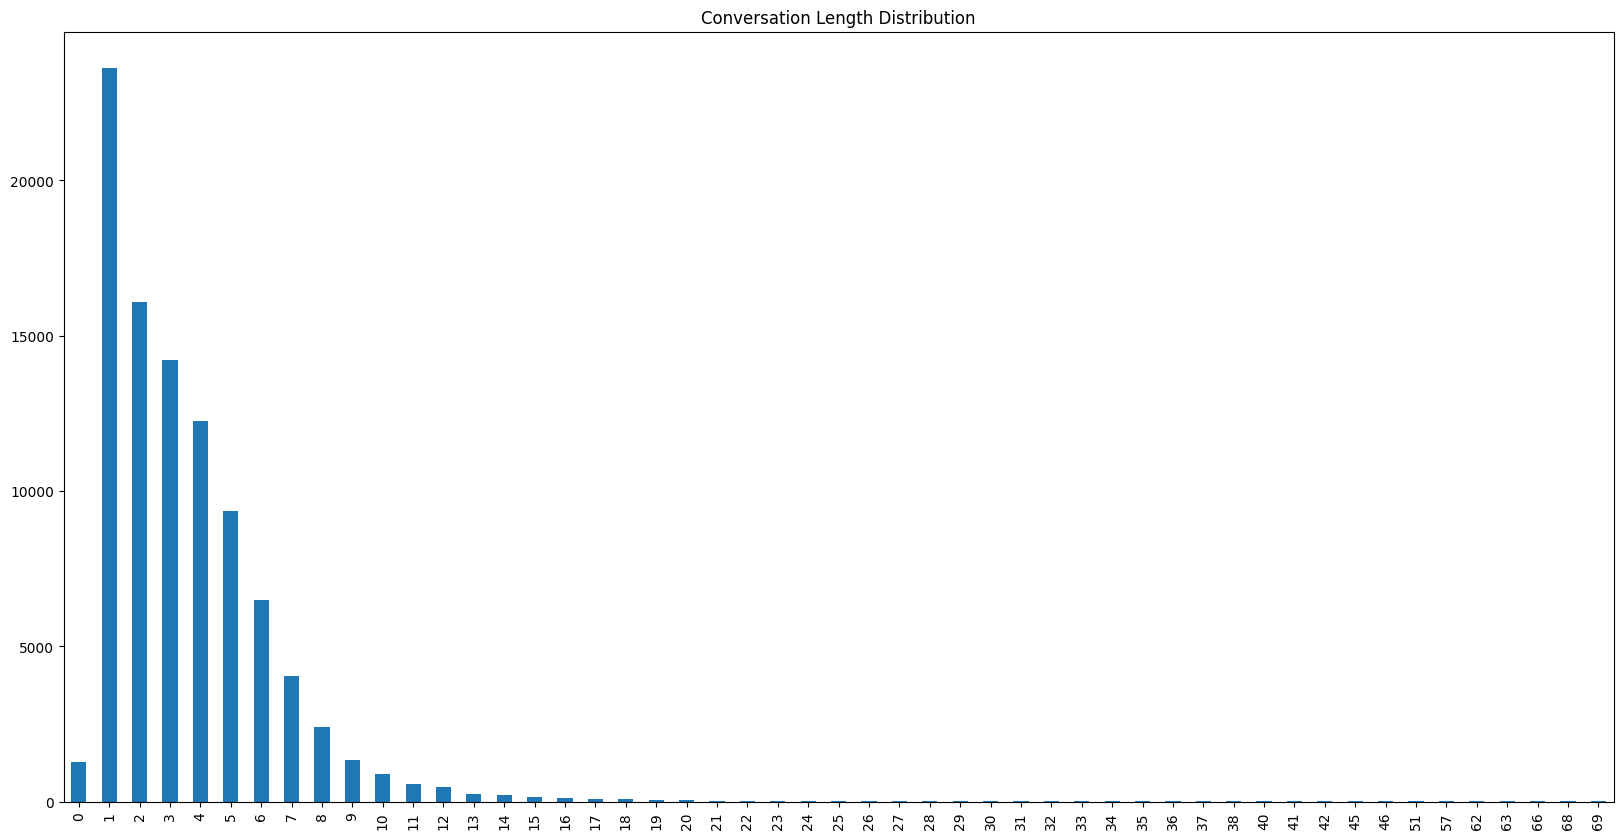

In [53]:
conv_turn_length_counter.plot(kind="bar", figsize=(20, 10), title="Conversation Length Distribution")